# Polynomial regression 

In this assignment we investigate the change in average temperature per year in the Netherlands. We are looking for a model that can accurately predict the average temperature of a year. We use polynomial regression for this.

We will perform the following steps:
- Load the dataset
- Prepare the data set
- Perform regression
- Evaluate the results
- Plot and evaluate the learning curves

For this assignment we use the GlobalLandTemperaturesByCountry.csv.
Source: https://www.kaggle.com/siddharthnishtala/basic-polynomial-regression-india/data.

Some code will be given. In this case, make sure that the variable names are the same!

In [169]:
# all packages we need
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## 1. Read and prepare the data
Perform the following steps:

#### 1. Read in:
- Read the CSV file.

#### 2a. Prepare - remove what is unnecessary

- Select only the rows where ** Country ** is ** Netherlands **.
- With method `dropna ()` remove the rows where ** NaN ** 's exist for the ** AverageTemperature **.
- Remove the columns with no added value: ** AverageTemperatureUncertainty ** and ** Country **.


#### 2b. Prep - create what is needed

- Create a new column ** Year **, in which we store the year of the measurement. Use the method `df.index.year`

#### 2c. Aggregate

- We now have a data frame with multiple temperature data per year. We will aggregate these to get a table with year and average temperature.
- Using the data frame made above, create a new data frame with average temperature per year. To do this, use the method `df.groupby (). Mean ()`
- Remove the years for which less than 12 values are known (why do we do this?)

#### 2d. Plot the data

- Plot the data (year on the x-axis, average temperature on the y-axis) to inspect it. What do you see?

## Code to prepare the data

In [8]:
# 1. load the data
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0, parse_dates=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [3]:
# 2a. enter your code here for the next steps
# Select only the rows where Country is Netherlands.
# Using method dropna () remove the rows where NaNs occur for the AverageTemperature.
# Remove the columns with no added value: AverageTemperatureUncertainty and Country.

In [ ]:
# 2b. enter your code here for the next steps
# create column Year, in which we store the year of the measurement. use df.index.year

In [10]:
df.head()

,AverageTemperature,Year
dt,,
1743-11-01,8.009,1743
1744-04-01,8.443,1744
1744-05-01,11.643,1744
1744-06-01,14.773,1744
1744-07-01,16.277,1744


In [ ]:
# 2c. enter your code for the aggregation here
# Create data from df data frame with average temperature per year; use df.groupby (). mean ()
# Delete the years for which less than 12 values are known
data = data[df["Year"].value_counts()==12]

In [19]:
data.head()
# in the generated overview year 1753 must have a temperature of 9.440083

,AverageTemperature,Year
Year,,
1753,9.440083,1753
1754,9.111833,1754
1755,8.924750,1755
1756,9.568667,1756
1757,9.436250,1757


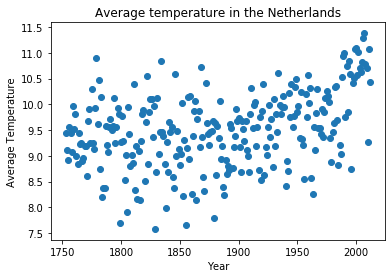

In [13]:
# 2d. Plot the data
data["Year"] = data.index
plt.scatter(data["Year"], data["AverageTemperature"])
plt.ylabel('Average Temperature')
plt.xlabel('Year')
plt.title('Average temperature in the Netherlands')
plt.show()

## Moving average every 10 years

We are now going to take the moving average every 10 years. This reduces the variance in the data set. When applying the moving average, NaNs sometimes arise again. We have to remove it again. The code for this is given below. Then we plot the year `x` against the mean temperature` y`.

sources:
- moving average: https://en.wikipedia.org/wiki/Moving_average
- moving average in pandas: https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.rolling.html

NOTE: 10 was chosen randomly as the rolling average window. Feel free to try other windows later.

In [158]:
# code for moving average
df = data["AverageTemperature"].rolling(window=10).mean()
df = df.dropna()

y = df.values.reshape(-1,1)
X = df.index.values
X = X.reshape(-1,1)


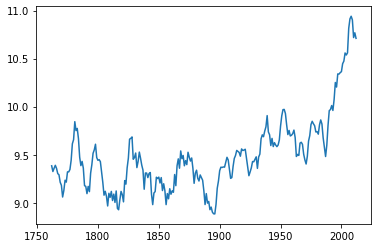

In [159]:
# Plot the data
plt.plot(X,y)
# add code here to enhance the plot 


## 3. Perform polynomial regression

By plotting the moving average, we now have a sense of how the regression line should run. This is clearly not linear but a polynomial. We will now try in steps to fit the line with polynomial regression. We do this with the following steps

#### 3a. Prepare the data
- Normalize the data.
We do this with a `StandardScaler ()` that normalizes to a Z score. We use the code from the `sklearn.preprocessing`. We always normalize the X values.
- Split the data into train and test set.
We use the method `train_test_split` from the module` sklearn.model_selection`. Take a `test_size = 0.3` and` random_state = 1`

#### 3b. Model
- Now try the polyfit model with different polynomial degrees (eg grade 1,2,3,4,10,40).
- Plot the model against the data

#### 3c. Evaluate
- Calculate the Mean Square Error (Or the Root Mean Square Error) of the train and test data
- What do you think is the best model? Why?

In [165]:
#Functions you need
def model(X, y, degree):
    """ function that models a polynomial"""
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    print(f'\nmodel outcome for {degree} degrees:')
    print(f'intercept: {lin_reg.intercept_} coefficient {lin_reg.coef_}')
    return [lin_reg, poly_features]


def predict(X, model, poly_features, n=1000):
    """ function that predicts y based on a model """
    X_pred=np.linspace(X.min(), X.max(), n).reshape(n, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    return [X_pred, y_pred]


# Plot the points and the regression curve
def plot_polynomial(X,y,X_pred,y_pred):
    """function that plots data and prediction"""
    plt.plot(X, y, "b.", label = 'Data')
    plt.plot(X_pred, y_pred, "r-", linewidth=2, label="model trainset")
    plt.ylabel('Average Temperature')
    plt.xlabel('Year')
    plt.title('Average temperature in the Netherlands -  TRAIN')
    plt.legend()
    plt.show()

In [166]:
#3a. Normalize the data (no changes needed)
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [167]:
#3a. Split de data (you can change test size if you want)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("train and test are splitted in:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

train en test zijn opgesplitst in:
(200, 1) (200, 1)
(51, 1) (51, 1)



model outcome for 3 degrees:
intercept: [9.26708662] coefficient [[0.12447822 0.23135511 0.08295869]]


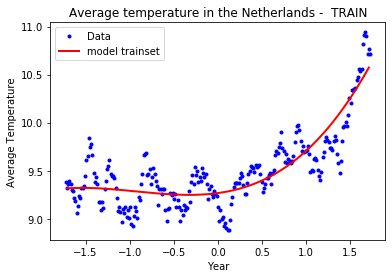

Mean squared error: 0.35


In [168]:
#3b. Model
degree = 3 # change this
# call the model function
# call predict() 
#3b. call plot_polynomial() to plot

#3c. calculate mean squared error from test set
X_pred, y_pred = predict(X_test, lin_reg, poly_features, len(y_test))
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

## Next

This is the end of this notebook. We looked at only 1 feature and different order (degrees) of the model. Some models perform better than others. We can see that by the (root) mean square error. Because we only had 1 feature, we could visualize it easily. This becomes more difficult with multiple features. Next we will look at a technique called ** learning curve **. That is a method where you can evaluate models with multiple features.